In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_stripes(df, x_col, y_col, title="Stripes Plot"):
    """
    Plots a stripes chart for the given DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        x_col (str): The column to be used for the x-axis (categorical).
        y_col (str): The column to be used for the y-axis (numerical).
        title (str): The title of the plot.
    """

    plt.figure(figsize=(12, 6))
    sns.stripplot(x=x_col, y=y_col, data=df, jitter=True, alpha=0.7)
    plt.title(title)
    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
    plt.tight_layout()
    plt.show()

def plot_birds(df):

    # Count the number of species by status
    status_counts = df['Status'].value_counts()

    # Plot setup
    plt.figure(figsize=(10, 6))
    sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')

    # Title and labels
    plt.title('Bird Species in Florida by Status')
    plt.xlabel('Status')
    plt.ylabel('Number of Species')
    plt.xticks(rotation=45, ha='right')

    # Annotate bars with counts
    for i, count in enumerate(status_counts.values):
        plt.text(i, count + 2, str(count), ha='center', va='bottom')

    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

def plot_notable(df):
    # Manually define notable species
    notable_species = {
        "Florida Scrub-Jay": "Endemic",
        "Wood Stork": "Endangered",
        "Snail Kite": "Endangered",
        "Ivory-billed Woodpecker": "Extinct",
        "Carolina Parakeet": "Extinct",
        "Passenger Pigeon": "Extinct"
    }

    # Filter your existing dataframe (assuming it's named df)
    notable_df = df[df['Subspecies Name'].isin(notable_species.keys())].copy()
    notable_df['Highlight'] = notable_df['Subspecies Name'].map(notable_species)

    # Use species name or subspecies for label
    notable_df['Label'] = notable_df.apply(
        lambda row: row['Subspecies Name'] if pd.notnull(row['Subspecies Name']) else row['Species'], axis=1
    )

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Highlight', y='Taxonomic Order', data=notable_df, hue='Label', dodge=False, palette='Set2')

    plt.title('Highlighted Bird Species in Florida')
    plt.xlabel('Category')
    plt.ylabel('Taxonomic Order (Proxy for Position)')
    plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv("/content/gdrive/My Drive/Bird Checklist.csv")
# Quick preview
print(df.head())
print(df.info())


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
   Taxonomic Order                       Species Subspecies Name  \
0                1  Black-bellied Whistling-Duck             NaN   
1                2        Fulvous Whistling-Duck             NaN   
2                3                    Snow Goose             NaN   
3                4                  Ross's Goose             NaN   
4                5   Greater White-fronted Goose             NaN   

          Scientific name    Family          Status Review  
0  Dendrocygna autumnalis  ANATIDAE  Native species    NaN  
1     Dendrocygna bicolor  ANATIDAE  Native species    NaN  
2      Anser caerulescens  ANATIDAE  Native species    NaN  
3            Anser rossii  ANATIDAE  Native species    NaN  
4         Anser albifrons  ANATIDAE  Native species    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 7 

<ipython-input-6-705e8bc850dd>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')


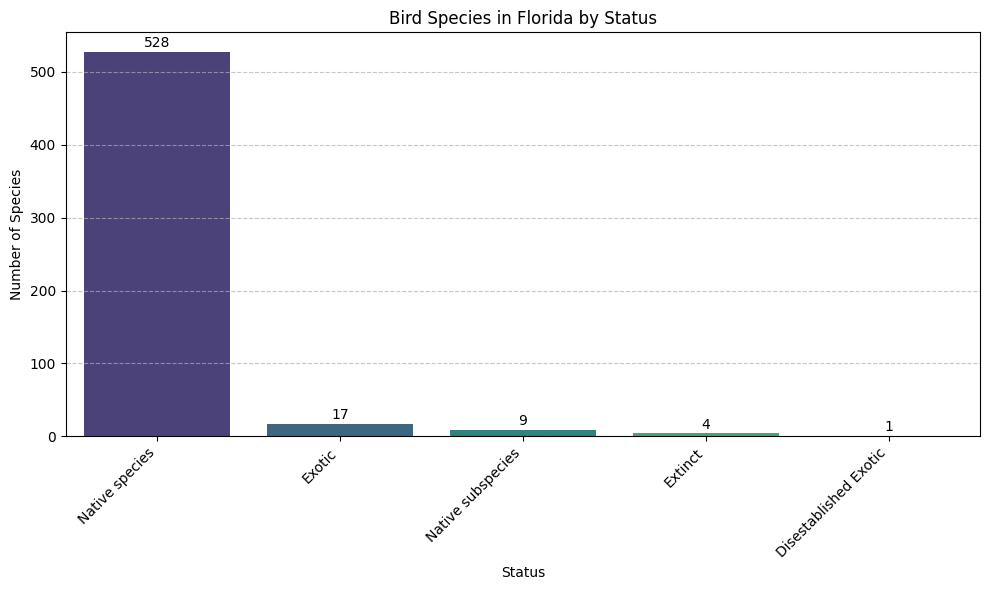

In [7]:
plot_birds(df)

<ipython-input-6-705e8bc850dd>:73: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')


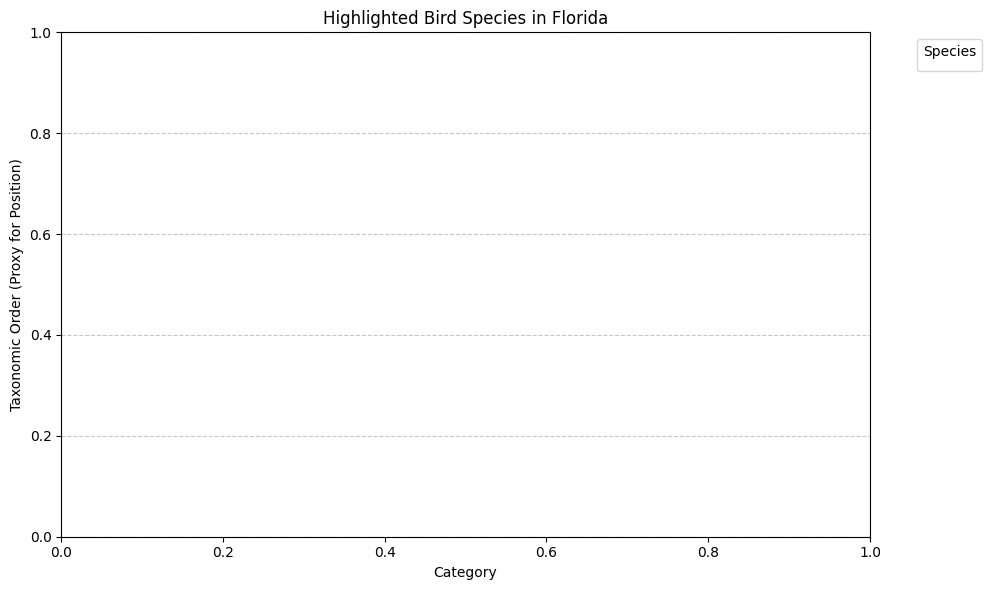

In [8]:
plot_notable(df)